# Assignment

- You are given several data sets in text format.  For each of them:
  - Plot the data along with errorbars - explain how you obtain the size of the errorbars.
  - Propose a possible best curve fit for each of the data sets.  The exact nature of the function is not given, but some clues may be available.  
  - Perform a curve fitting using appropriate techniques for each of the data.  You need to explain whether you are choosing to use a linear or nonlinear curve fit, and why it is the right approach.  Comment on the accuracy of your approach and whether it gives a good result, or something better could have been done.
- For the straight line fit from the example above, compare the time taken, and accuracy of the fit, for `lstsq` *vs* `curve_fit`.  Comment on your observations.

# Data Set-1 : Fitting of straight line and Plotting of error bar

### Reading of Data_set1

In [7]:
data=[]
x_data=[] #stores x-values of data
y_data=[]  #stores y-value of dataset
# Function to read data and store it into data and x-data and y-data
def read_Data():
    with open('data1.txt','r')as mainfile:
        data.clear()
        Content_of_main_file=mainfile.readlines()
        for each_line in Content_of_main_file:
            data.append(each_line)
        x_data.clear()
        y_data.clear()
        for index in range(len(data)):
            raw_data=data[index].split()
            x_data.append(float(raw_data[0]))
            y_data.append(float(raw_data[1]))

        
read_Data()  #calling read data funciton to read data from data set1

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###  By Using curve_fit Mehtod for Curve Fitting

Equation for st.line is : y=2.7911242472208153X +3.848800089588013 , where slope(m)=2.7911242472208153 and constant c=3.848800089588013 for line y=mx+c


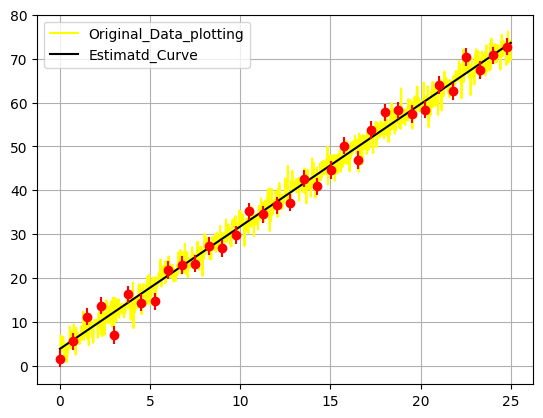

In [9]:
#fucntion Objective used to fit st. line 
def objective(x,a,b):
    return a*x+b

# using curve_fit from scipy library to find the parameter so fit the best curve on the given Data Points.
from scipy.optimize import curve_fit
popt=curve_fit(objective,x_data,y_data)
a,b=popt
b=a[1]
a=a[0]

# plt.plot(x_data,y_data,'--',color='green')
print(f'Equation for st.line is : y={a}X +{b} , where slope(m)={a} and constant c={b} for line y=mx+c')

# x_line = np.arange(int(min(x_data)), int(max(x_data)+1), 1)
x_data=np.array(x_data)
y_data=np.array(y_data)

# calculate the output for the range
y_line = objective(x_data, a, b)
y_error=y_data-(a*x_data+b)

plt.plot(x_data,y_data,color='yellow',label='Original_Data_plotting')  #Plotting of original data.
plt.plot(x_data, y_line, color='black',label='Estimatd_Curve')  # plotting of line calculated by using scipy library function curve fit.
plt.errorbar(x_data[::30],y_data[::30],np.std(y_error),fmt='ro')  #plotting of error bar at the interval of 30 points and finding the error by using standard deviation method.
plt.grid()
plt.legend()
plt.show()



### By Using lstsq method for curve Fitting 

In [10]:
#Using numpy.column_stack funciton to arrange the given data into column like structure so that we can use np.linalg.lstsq to solve and find the value of parameters a and b.
M=np.column_stack([x_data,np.ones(len(x_data))])
(p1,p2),_,_,_=np.linalg.lstsq(M,y_data,rcond=None)  # using the numpy function to find the parameters.
print(f'The estimated equation is {p1} x + {p2} ')

The estimated equation is 2.791124245414921 x + 3.848800101430749 


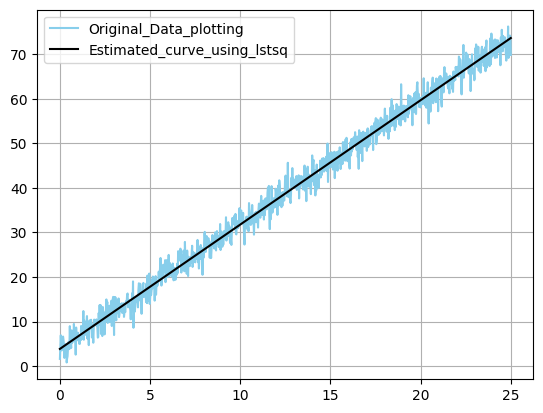

In [11]:
Y_using_lstsq=[]
for ele in x_data:
    Y_using_lstsq.append(objective(ele,p1,p2))

plt.plot(x_data,y_data,color='skyblue',label='Original_Data_plotting')
plt.plot(x_data,Y_using_lstsq,label='Estimated_curve_using_lstsq',color='black')
plt.legend()
plt.grid()
# plt.plot(x_line,y_line)

In [12]:
print('The time taken by curve_fit method : ',end='')
%timeit curve_fit(objective,x_data,y_data)
print('The time taken by lstsq method : ',end='')
%timeit np.linalg.lstsq(M,y_data,rcond=None)


The time taken by curve_fit method : 105 µs ± 2.49 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
The time taken by lstsq method : 18 µs ± 31.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


As we can see the time taken by the **lstsq method** to find the parameters is better than time taken by **curve_fit** method because the lstsq method is using the matrix technique to solve the parameter estimation while the **curve_fit method** iterate over the given dataset to estimate the parameter so that it is taking more time than **lstsq method**.

In [13]:
# y_error=np.square(y_error)
y_error_using_curve_fit=y_data-(a*x_data+b)
y_error_using_curve_fit=np.square(y_error_using_curve_fit)
y_error_using_lst=y_data-(p1*x_data+p2)
y_error_using_lst=np.square(y_error_using_lst)
avg_mean_sq_error_curve_fit=np.sum(y_error_using_curve_fit)
avg_mean_sq_error_lastsq=np.sum(y_error_using_lst)
print(avg_mean_sq_error_curve_fit)
print(avg_mean_sq_error_lastsq)


3983.412380573275
3983.412380573276


## Explanationof above code and Observation:
- As we can see the mean square error of both the fucntion is giving the approximately same value , Both the fucntion are good enough to minimize the error.

# Code for Analysis Dataset-2 (II)
# Fourier Series Dataset

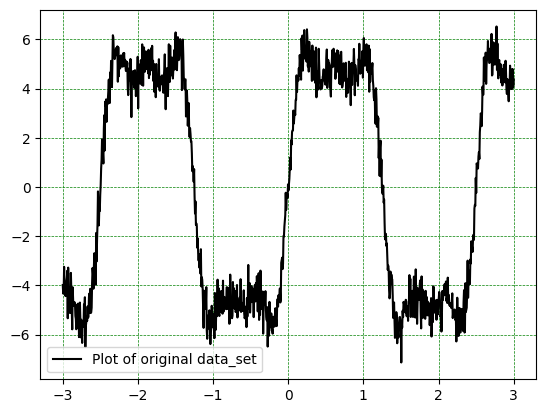

In [14]:
data_set2=[]
x_data_set2=[]
y_data_set2=[]

# Functio to read and store data from data_set2 
def read_Data_set2():
    with open('data2.txt','r')as mainfile2:
        data_set2.clear()
        Content_of_main_file2=mainfile2.readlines()
        for each_line in Content_of_main_file2:
            data_set2.append(each_line)
        x_data_set2.clear()
        y_data_set2.clear()
        for index in range(len(data)):
            raw_data2=data_set2[index].split()
            x_data_set2.append(float(raw_data2[0]))
            y_data_set2.append(float(raw_data2[1]))
read_Data_set2()


# Plotting of dataset to analyse the dataset
plt.plot(x_data_set2,y_data_set2,color='black',label='Plot of original data_set')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend()

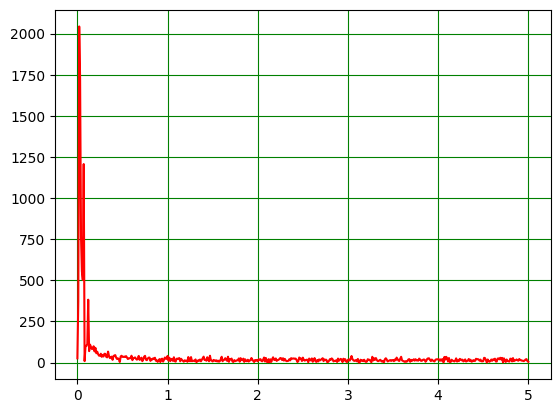

In [15]:
# Using scipy inbuilt function to find the no and which frequency are present in given dataset of fourier dataset
from scipy.optimize import curve_fit
from scipy.fft import rfft,rfftfreq,fft,fftfreq
n    = len(x_data_set2)
yf   = np.fft.rfft(y_data_set2) 
xf   = rfftfreq(n,0.1)

plt.plot(xf,np.abs(yf),color='red')
plt.grid(color = 'green')



For finding the which component are present in the given dataset I am using the inbuilt function of numpy rfft. This function will give me fourier transform of the given array. The no of peaks will give me the no of sine waves that are present and the small peaks are noise.

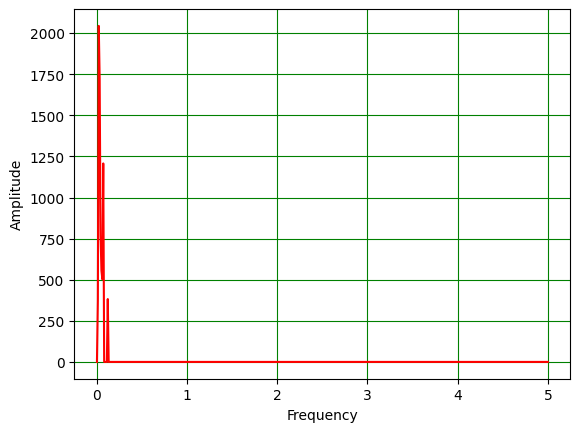

In [16]:
yf_abs      = np.abs(yf) 
indices     = yf_abs>300   # filter out those value under 300 because i am assuming those are below are noises
yf_clean    = indices * yf # noise frequency will be set to 0
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.plot(xf,np.abs(yf_clean),color='red')
plt.grid(color = 'green')

## The above is Curve after filtering the noises

In [17]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(abs(yf_clean))
print('Frequencies that are present in the given data of fourier : ')
print(peaks)


Frequencies that are present in the given data of fourier : 
[ 2  7 12]


6.015197938136765 1.9972233411030673 0.9777224524649416 1.2567913592537894 1.0783441921315429 1.044262716688087
0.003148642013963633 -0.003371632619777333 0.0002715483675388191


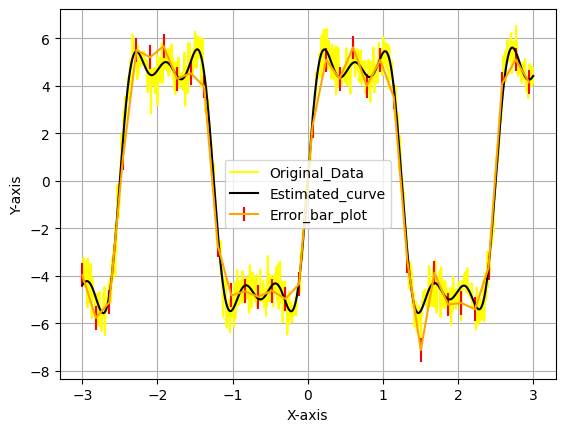

In [30]:

def sin1(x,a1,a2,a3,a4,a5,a6,theta1,theta2,theta3):
    return a1*np.sin(2*a4*x+theta1)+a2*np.sin(7*a5*x+theta2)+a3*np.sin(12*a6*x+theta3)

(a1,a2,a3,a4,a5,a6,theta1,theta2,theta3),popt=curve_fit(sin1,x_data_set2,y_data_set2)
# print(popt)
print(a1,a2,a3,a4,a5,a6)
print(theta1,theta2,theta3)
x_data_set2=np.array(x_data_set2)
yline_2=sin1(x_data_set2,a1,a2,a3,a4,a5,a6,theta1,theta2,theta3)

plt.plot(x_data_set2,y_data_set2,'yellow',label='Original_Data')
plt.errorbar(x_data_set2[::30],y_data_set2[::30],np.std(y_data_set2-yline_2),ecolor='r',color='orange',label='Error_bar_plot')
plt.plot(x_data_set2,yline_2,'black',label='Estimated_curve')
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
plt.grid()
plt.legend()
plt.show()



## Explanation of above Code and Graph
I have defined Function **sin1()** for estimating the cofficient and the value of frequency using **scipy curve_fit method**.After Estimating the **cofficient and the frequency** that are present i am using the defined function **sin1()** to find the corresponding value of y using the estimated parameter and then after using that estimated value to fit the estimated curve over the original dataset.
- Original data_plot=>**Yellow color**
- Estimated_curve plot=>**Black color**
- Error_Bar=>**Red and orange**
 We can see the Estimated Curve is fitting almost completely in the given data_set ,so it is a good estimation.I am using the standard deviation to find the length of error bar using the difference between the actual vlaue and the estimated value.

# Code and Analysis of Dataset-3 (Black Body radiation)
#### Rading of dataset3

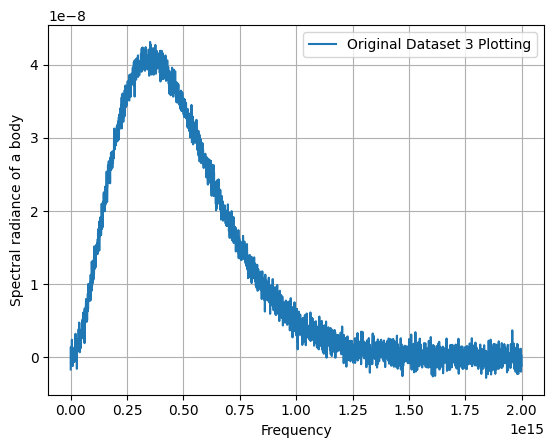

In [19]:


data_set3=[]
x_data_set3=[]
y_data_set3=[]
# Function for reading the dataset 3
def read_Data_set3():
    with open('data3.txt','r')as mainfile3:
        data_set3.clear()
        Content_of_main_file3=mainfile3.readlines()
        for each_line in Content_of_main_file3:
            data_set3.append(each_line)
        x_data_set3.clear()
        y_data_set3.clear()
        for index in range(len(data_set3)):
            raw_data3=data_set3[index].split()
            x_data_set3.append(float(raw_data3[0]))
            y_data_set3.append(float(raw_data3[1]))

read_Data_set3()  

plt.plot(x_data_set3,y_data_set3,label='Original Dataset 3 Plotting') # Plotting the Actual dataset to do analysis
plt.grid()
plt.ylabel('Spectral radiance of a body')
plt.xlabel('Frequency')
plt.legend()
plt.show()

### Defining the Function plank_func to take the input :
- v-Frequency
- t-Temperature
- h-Planks constant
And it's returning the val of Intensity of radiation of body

In [20]:
c=3e8
k=1.38e-23

# Defining the function to find the Intensity from given the data.
def plank_func(v,t,h):
    x=2*h*v**3
    y=(h*v)/(k*t)
    return x/((c**2)*(np.exp(y)-1))

6011.361516744167 6.643229751115107e-34


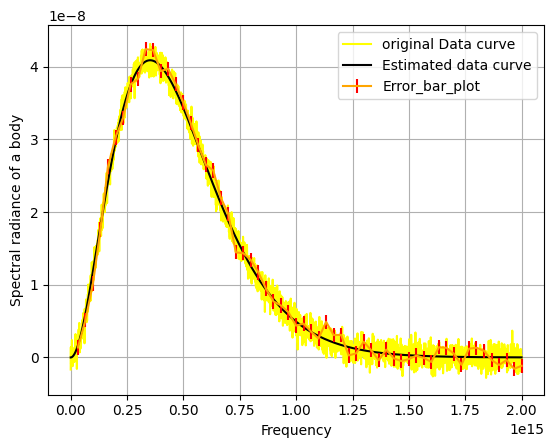

In [21]:
(Temp,h_plank_const),_=curve_fit(plank_func,x_data_set3,y_data_set3,p0=(4000,6e-34)) # Using the curve_fit method to estimate temp and  plank_const value
print(Temp,h_plank_const)

# spec=plank_func(x_data_set3,Temp,h_plank_const)

yline_3=[]  # for storing the estimated value using the estimated parameter

for ele in x_data_set3:
    yline_3.append(plank_func(ele,Temp,h_plank_const))
plt.plot(x_data_set3,y_data_set3,'yellow',label='original Data curve')
plt.plot(x_data_set3,yline_3,'black',label='Estimated data curve')
x_data_set3=np.array(x_data_set3)
y_data_set3=np.array(y_data_set3)

plt.errorbar(x_data_set3[::50],y_data_set3[::50],np.std(y_data_set3-yline_3),ecolor='r',color='orange',label='Error_bar_plot')
plt.ylabel('Spectral radiance of a body')
plt.xlabel('Frequency')
plt.legend()
plt.grid()
plt.show()

# Code for dataset 4

In [22]:
data_set4=[]
x_data_set4=[]
y_data_set4=[]
def read_Data_set4():
    with open('dataset4.txt','r')as mainfile4:
        data_set4.clear()
        Content_of_main_file4=mainfile4.readlines()
        for each_line in Content_of_main_file4:
            data_set4.append(each_line)
        x_data_set4.clear()
        y_data_set4.clear()
        for index in range(len(data)):
            raw_data4=data_set4[index].split()
            x_data_set4.append(float(raw_data4[0]))
            y_data_set4.append(float(raw_data4[1]))
read_Data_set4()
print(max(x_data_set4))

# print(x_data_set4.count(5))

10.0


I am finding the mean and using that i am finding a fucntion to find the best fit curve to fit on the mean so that it wil  fit properly

0
.


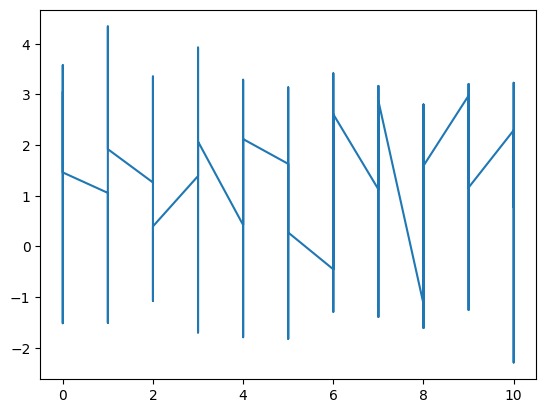

In [23]:
import numpy as np
plt.plot(x_data_set4,y_data_set4)
x_mean=[]
Unique_x=set()
for ele in x_data_set4:
    Unique_x.add(ele)
print(data_set4[1][0])
dict_ele={}
for ele in Unique_x:
    dict_ele[ele]=[]

print(data_set4[0][1])
for i in range(len(data_set4)):
    x=data_set4[i].split()[0]
    dict_ele[float(x)]+=[float(data_set4[i].split()[1])]
for ele in dict_ele:
    x_mean.append(np.mean(dict_ele[ele]))


Unique_x=list(Unique_x)
num_Unique_x=np.array(Unique_x)



11
The line satisfies the best fit curve is 0.01941221713633212x+0.8999624797725337
0.01941221713633212 0.8999624797725337


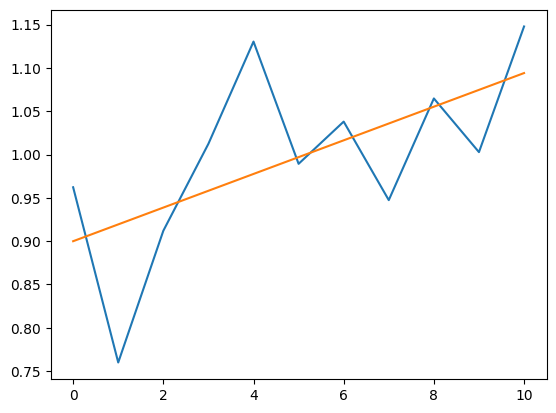

In [24]:
plt.plot(Unique_x,x_mean)
def estimate(x,a,b):
    return a*x+b
# x_data_set4=[i for i in range(11)]
print(len(x_mean))
(a1,b1),_=curve_fit(estimate,num_Unique_x,x_mean)
    
print(f'The line satisfies the best fit curve is {a1}x+{b1}')
print(a1,b1)
Yline4=(estimate(num_Unique_x,a1,b1))
# print(Unique_x,Yline4)
plt.plot(Unique_x,Yline4)


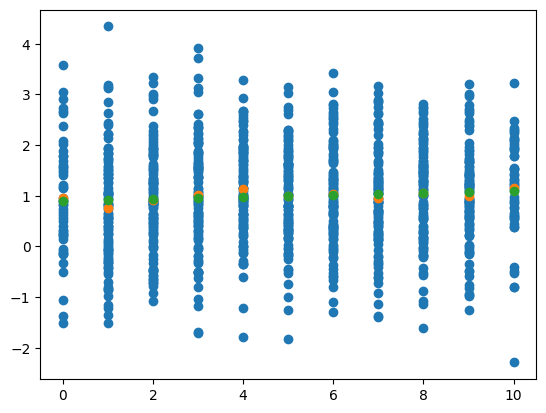

In [25]:
plt.scatter(x_data_set4,y_data_set4)
plt.scatter(Unique_x,x_mean)
plt.scatter(Unique_x,Yline4)

(array([  5.,  25.,  77., 154., 255., 237., 155.,  70.,  19.,   3.]),
 array([-2.28883296, -1.6258088 , -0.96278464, -0.29976047,  0.36326369,
         1.02628786,  1.68931202,  2.35233618,  3.01536035,  3.67838451,
         4.34140868]),
 <BarContainer object of 10 artists>)

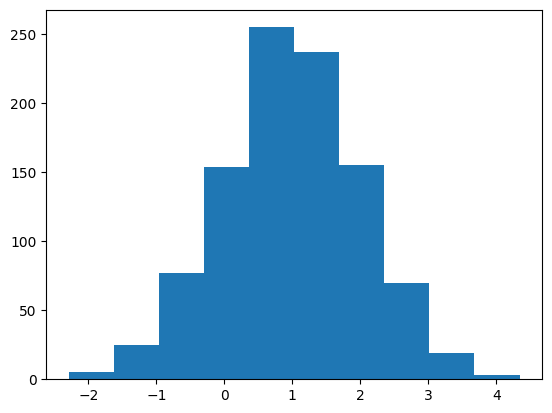

In [26]:
plt.hist(y_data_set4)

In [27]:
new_x4=[i for i in range(-15,15)]
import statistics as stat
std=stat.stdev(x_data_set4)
print(std)

2.916934779611726


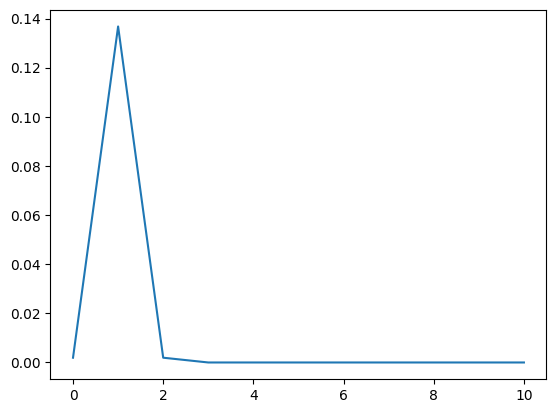

In [28]:
def gaussian (x,mu,sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp((-np.square(x-mu))/2*np.square(sigma))
x_line_new4=np.array(x_data_set4)
yline_new4=gaussian(x_line_new4,1,std)
plt.plot(x_line_new4,yline_new4)

#### I have used the gaussian distribution to find the prediction  and the data is like gaussian distribution .